In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels as sm
import matplotlib
import pandas as pd
import io
import requests
import ssl
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from pylab import *

# Turn off code warnings (this is not recommended for routine use)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import scipy.stats as sts

Дипломная работа по курсу «Python для анализа данных»

1. Загрузить файл hr.csv (можно найти во сложении к заданию)
2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
3. Рассчитать и визуализировать корреляционную матрицу для переменных
4. Визуализировать несколько взаимосвязей между переменными
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными
6. Рассчитать сколько работников работает в каждом департаменте
7. Показать распределение сотрудников по зарплатам
8. Показать распределение сотрудников по зарплатам совместно с департаментами
9. Сколько сотрудников покинули компанию
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

In [2]:
data = pd.read_csv('HR.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [51]:
data.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [8]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
data.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C83F7F0>,
      dtype=object)

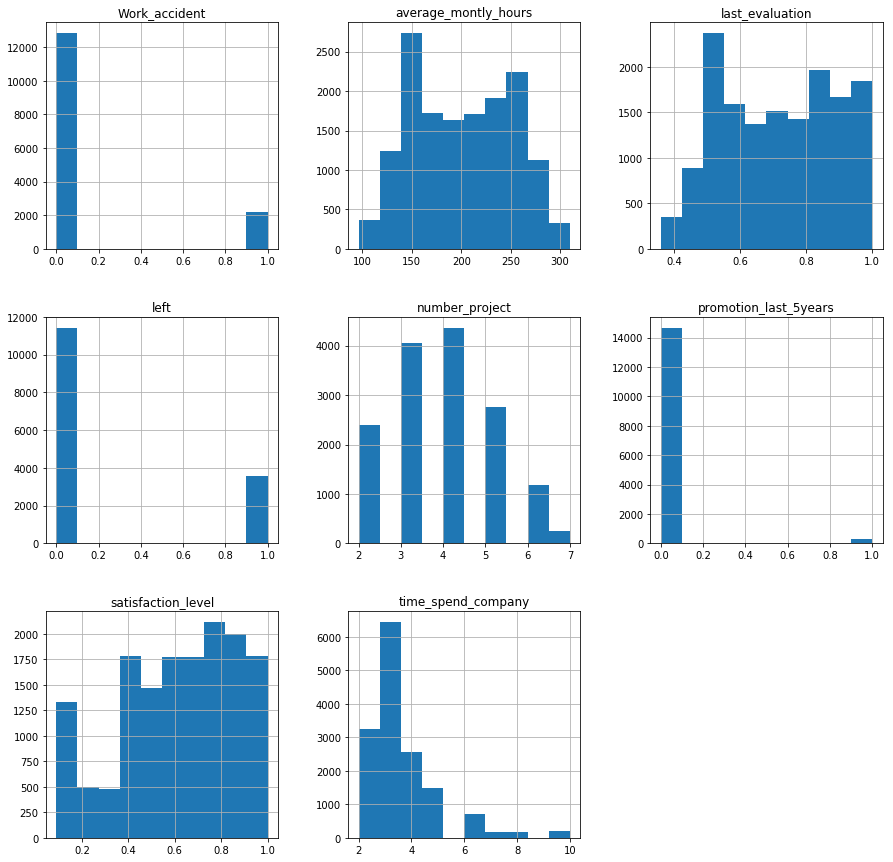

In [12]:
data.hist(figsize=(15,15))

In [3]:
df = data.iloc[:,:8]
headers = list(df.columns.values)

In [9]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df)
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = headers
df_norm.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,-0.362637,-0.46875,-1.0,-0.429907,-0.75,-1.0,1.0,-1.0
1,0.560440,0.56250,0.2,0.551402,0.00,-1.0,1.0,-1.0
2,-0.956044,0.62500,1.0,0.644860,-0.50,-1.0,1.0,-1.0
3,0.384615,0.59375,0.2,0.186916,-0.25,-1.0,1.0,-1.0
4,-0.384615,-0.50000,-1.0,-0.411215,-0.75,-1.0,1.0,-1.0


3. Рассчитать и визуализировать корреляционную матрицу для переменных

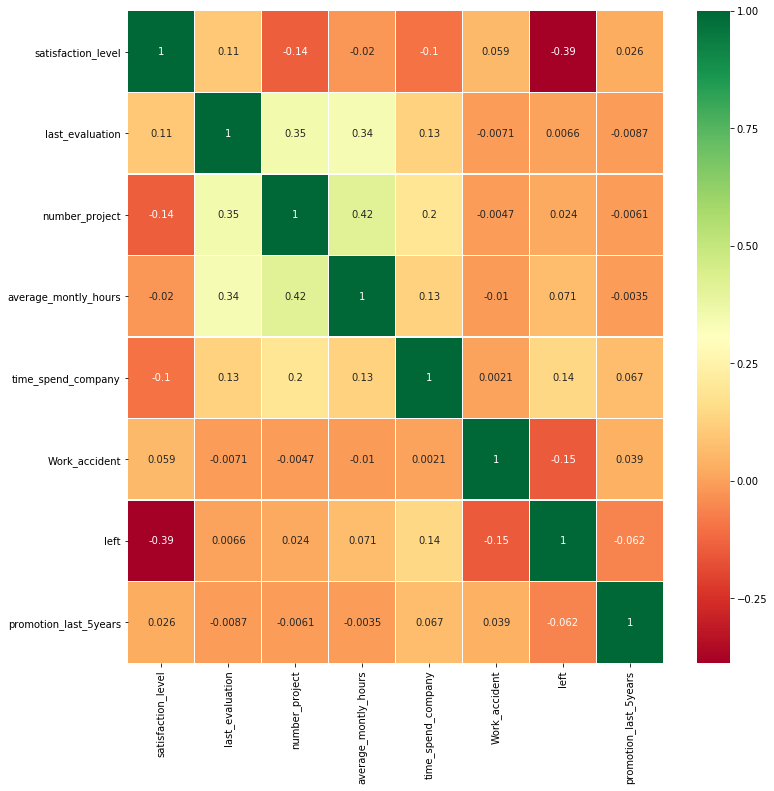

In [15]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Вывод:

сильных (коэффициент более 0,75) линейных зависимостей не наблюдаются;
наибольшие зависимости:
1) -0.39 - вероятно чем меньше уровень удовлетворения сотрудника, чем больше вероятность его ухода из компании
2) 0.42 - чем выше уровень и сложность проекта, тем больше времени сотрудник тратит на работу 

4. Визуализировать несколько взаимосвязей между переменным

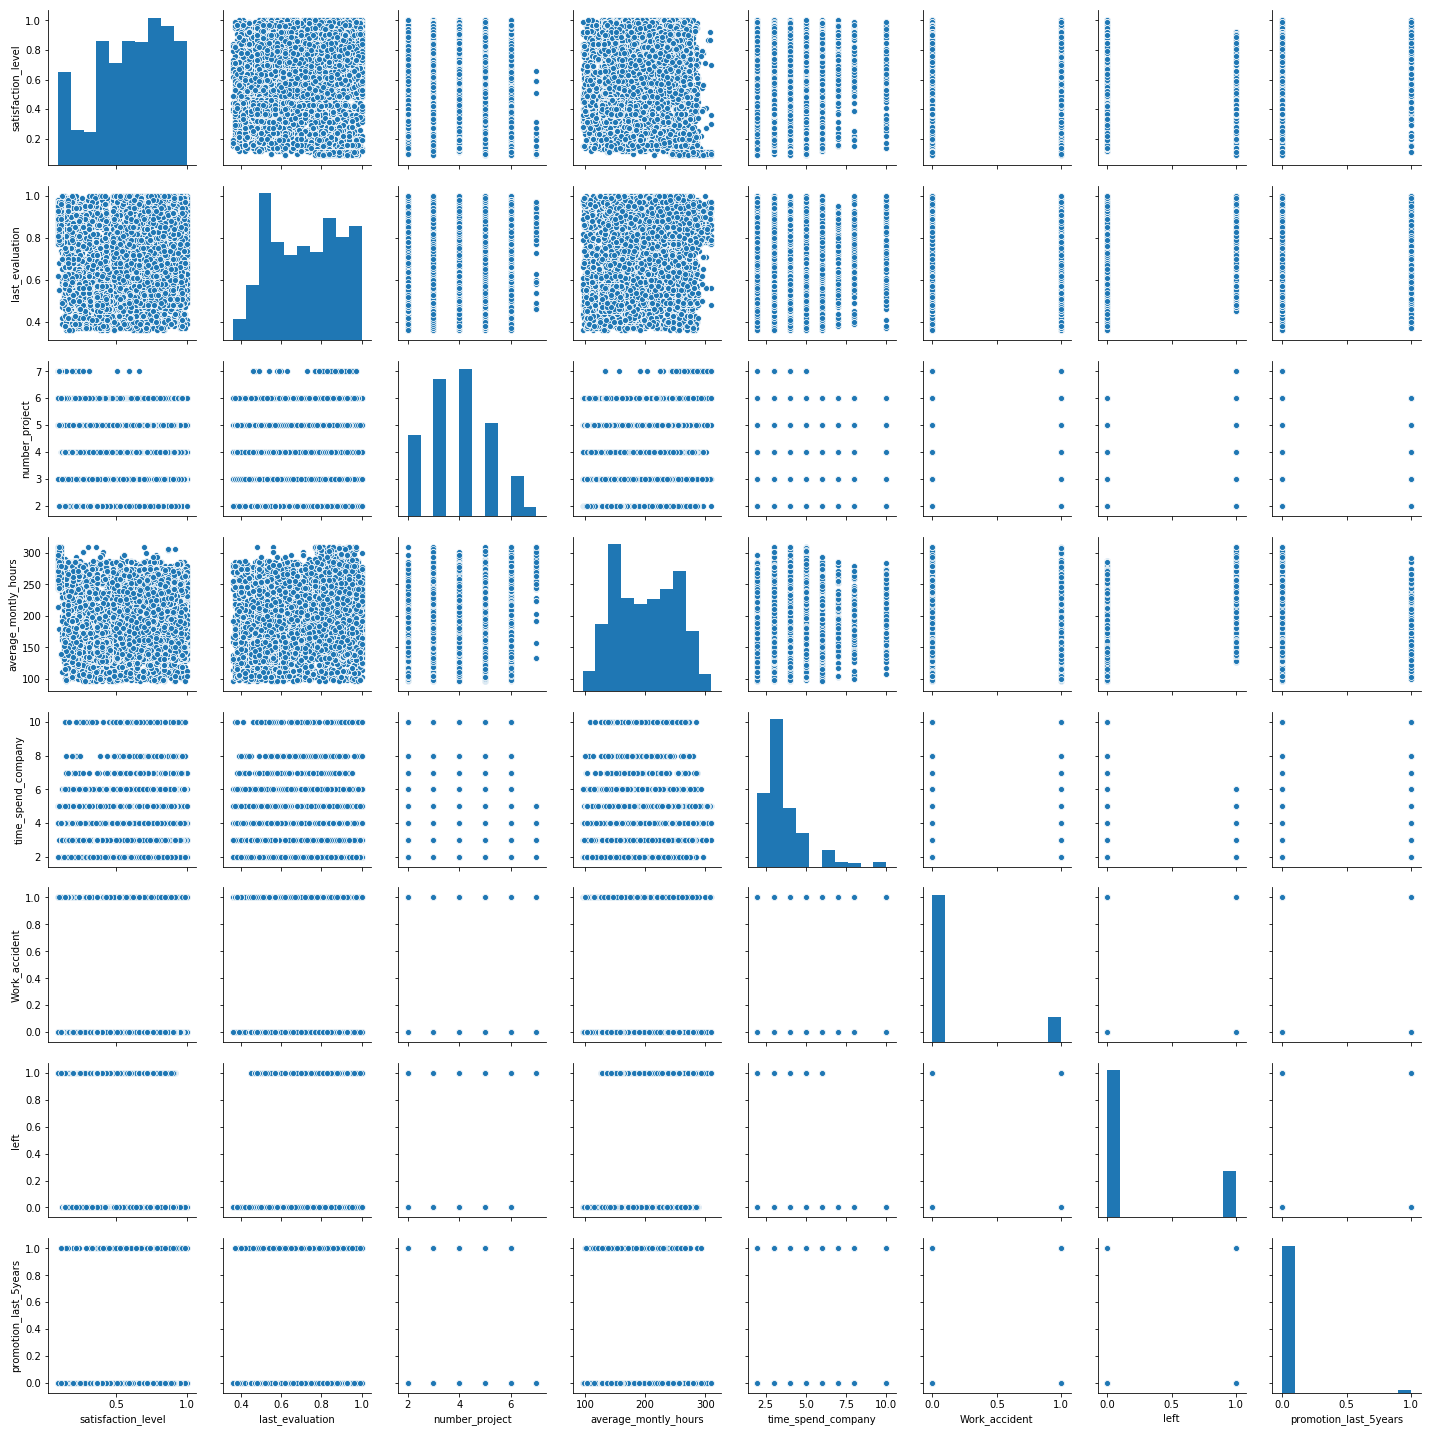

In [16]:
view = sns.pairplot(data)

In [5]:
from scipy.stats import pearsonr

Вывод: выраженных взаимосвязей между переменными не наблюдается.

5. С использованием t-test статистики проверить взаимосвязи между несколькими переменным

In [48]:
def check_ttest(data1, data2):   
    k2, p = stats.normaltest(data1)
    alpha = 0.01
    print("p = {:g}".format(p))

    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("Не нормальное распределение для alpha = ", alpha)
    else:
        print("Нормальное распределение для alpha = ", alpha)
        
        
    k2, p = stats.normaltest(data2)
    alpha = 0.01
    print("p = {:g}".format(p))

    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("Не нормальное распределение для alpha = ", alpha)
    else:
        print("Нормальное распределение для alpha = ", alpha)

    corr, p_value = pearsonr(data1, data2)
    print('Корреляция Пирсона: коэф-т', corr,', p-value', p_value)
    corr, p_value = sts.spearmanr(data1, data2)
    print('Корреляция Спирмена: коэф-т', corr,', p-value', p_value)
    corr, p_value = sts.kendalltau(data1, data2)
    print('Корреляция Кендалла: коэф-т', corr,', p-value', p_value)
    
    sns.regplot(x=data1, y=data2, fit_reg=True,marker=".")

p = 1.64129e-261
Не нормальное распределение для alpha =  0.01
p = 0
Не нормальное распределение для alpha =  0.01
Корреляция Пирсона: коэф-т -0.02004811321947298 , p-value 0.01407503544685661
Корреляция Спирмена: коэф-т 0.06199958683277002 , p-value 2.966043282755352e-14
Корреляция Кендалла: коэф-т 0.05112578059421947 , p-value 1.3770320825606148e-20


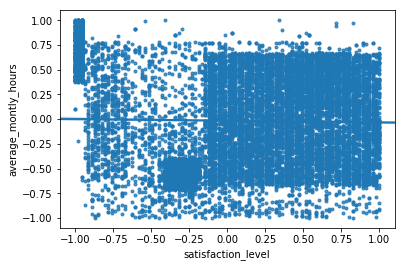

In [49]:
check_ttest(df_norm.satisfaction_level, df_norm.average_montly_hours)

6. Рассчитать сколько работников работает в каждом департаменте

In [60]:
data.sales.unique()
data.groupby(data.sales).count()['satisfaction_level'].sort_values(ascending=False)

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: satisfaction_level, dtype: int64

In [68]:

employee = data.pivot_table(
            index = 'sales', 
            columns = 'left', 
            values = ['satisfaction_level'], aggfunc = 'count', fill_value = 0).reset_index()
print('Количество работников по департаментам (0 - работают сейчас, 1 - было уволено):')
employee

Количество работников по департаментам (0 - работают сейчас, 1 - было уволено):


sales satisfaction_level      
left                               0     1
0              IT                954   273
1           RandD                666   121
2      accounting                563   204
3              hr                524   215
4      management                539    91
5       marketing                655   203
6     product_mng                704   198
7           sales               3126  1014
8         support               1674   555
9       technical               2023   697

Text(0.5, 1.0, 'Количество работников по департаментам')

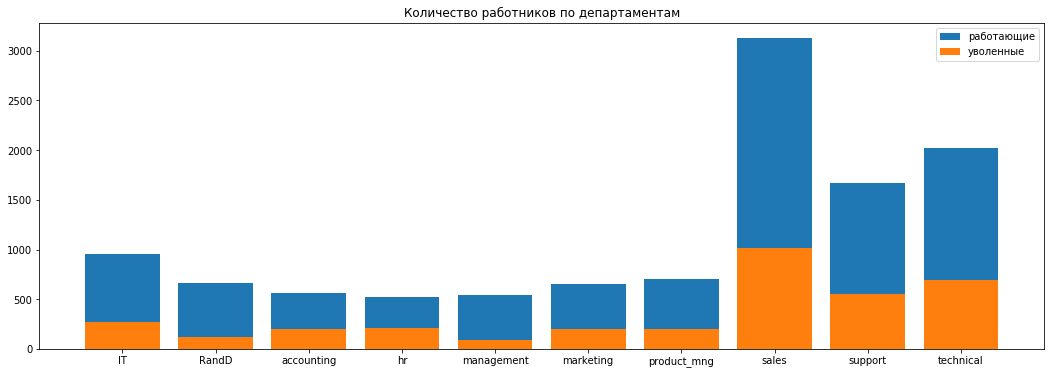

In [70]:
fig, ax = plt.subplots(figsize=(18, 6))
x = ax.bar(employee.sales, employee[('satisfaction_level',  0)], label='работающие')
y = ax.bar(employee.sales, employee[('satisfaction_level',  1)], label='уволенные')
ax.legend()
ax.set_title('Количество работников по департаментам')

7. Показать распределение сотрудников по зарплатам

salary
low       7316
medium    6446
high      1237
Name: satisfaction_level, dtype: int64


Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

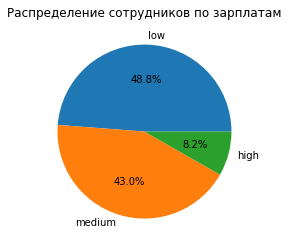

In [72]:
salaries = data.groupby(data.salary).count()['satisfaction_level'].sort_values(ascending=False)
print(salaries)
plt.pie(salaries,labels=salaries.index, autopct='%1.1f%%')
plt.title('Распределение сотрудников по зарплатам')

8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [77]:

dept_sal = data.pivot_table(
            index = 'sales', 
            columns = 'salary', 
            values = 'satisfaction_level', aggfunc = 'count', fill_value = 0).reset_index()
print('Количество работников по департаментам  и зарплатам:')
dept_sal 

Количество работников по департаментам  и зарплатам:


salary,sales,high,low,medium
0,IT,83,609,535
1,RandD,51,364,372
2,accounting,74,358,335
3,hr,45,335,359
4,management,225,180,225
5,marketing,80,402,376
6,product_mng,68,451,383
7,sales,269,2099,1772
8,support,141,1146,942
9,technical,201,1372,1147


9. Сколько сотрудников покинули компанию

In [85]:
print('Количество покинувших компанию сотрудников:', data[data.left == 1]['left'].count()) 

Количество покинувших компанию сотрудников: 3571


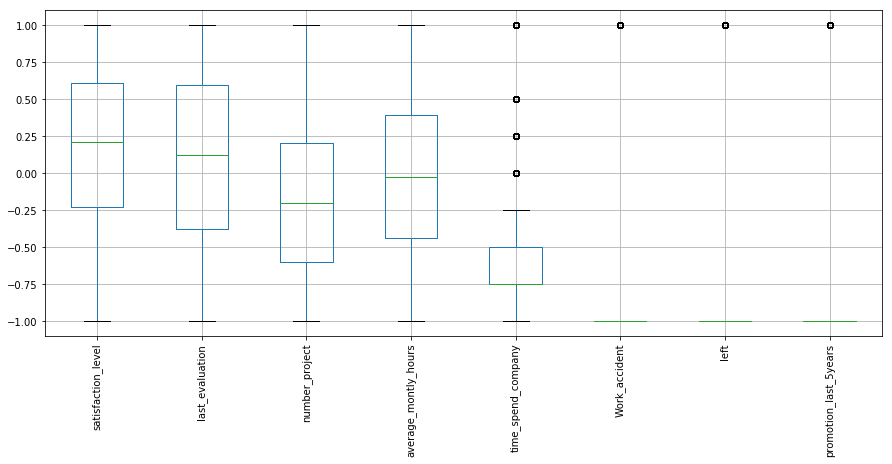

In [65]:
boxplot = df_norm.boxplot(figsize=(15,6), rot=90)

10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

#1 гипотеза - сотрудники с низкой зп покидают компанию 

In [7]:

low_salary = data[data['salary']=='low']['left']
stats.ttest_1samp(low_salary, data['left'].mean())

Ttest_1sampResult(statistic=11.007411787730103, pvalue=5.828800133014715e-28)

p-value равно 5.828800133014715e-28, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистическое различие между сотрудниками с низкой зп и всеми сотрудниками

H0 - выбранный показатель не влияет на увольнение сотрудника

In [17]:
print(len(df_norm[df_norm.left == 1.]))
print(len(data[data.left == 1]))

3571
3571


In [50]:
def check_grup(x):    
    work = df_norm[df_norm['left']==-1.][x]
    dnt_work = df_norm[df_norm['left']==1.][x]
    k,p = stats.ttest_ind(work, dnt_work)
    print(k,p)
    
    alpha=0.05
    if p > alpha:
        print('H0 верна')
    else:
        print('H0 не верна')
        
        
    sns.distplot(work, 50)
    sns.distplot(dnt_work, 50)
    plt.title('Плотность вероятности распределения')
    plt.legend(['уволившиеся', 'работающие'])
    plt.show()

In [51]:
def check_grup(x):    
    work = data[data['left']==0][x]
    dnt_work = data[data['left']==1][x]
    k,p = stats.ttest_ind(work, dnt_work)
    print(k,p)
    
    alpha=0.05
    if p > alpha:
        print('H0 верна')
    else:
        print('H0 не верна')
        
        
    sns.distplot(work, 50)
    sns.distplot(dnt_work, 50)
    plt.title('Плотность вероятности распределения')
    plt.legend(['уволившиеся', 'работающие'])
    plt.show()

Уровень удовлетворенностии и увольнение

51.61280155890104 0.0
H0 не верна


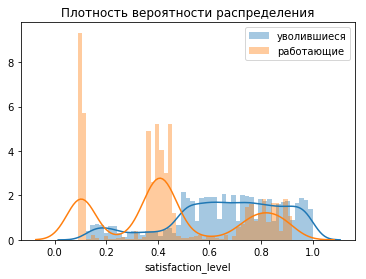

In [52]:
check_grup('satisfaction_level')

Вывод: p-value равно 0.0, что меньше стандартной альфа ошибки 0.05, нулевая гипотезу не может быть принята. Можно сказать, что имеется статистическое различие между удовлетворенностью работающих и уволившихся.

Последняя оценка и увольнение

-0.8042416167796329 0.4212701963735056
H0 верна


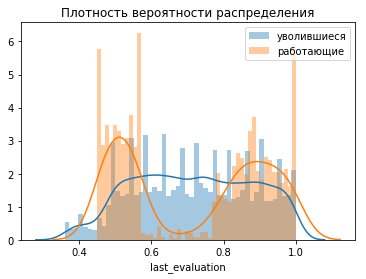

In [53]:
check_grup('last_evaluation')

Вывод: p-value равно 0.42, что больше стандартной альфа ошибки 0.05, нулевая гипотезу может быть принята. Можно сказать, что не имеется статистического различия между работающими и уволившимися по последней оценке.

Повышение последние 5 лет и увольнение

7.581195349367637 3.624047224146943e-14
H0 не верна


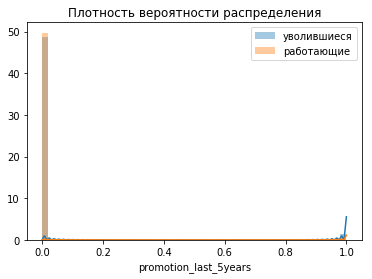

In [54]:
check_grup('promotion_last_5years') 

Вывод: p-value меньше стандартной альфа ошибки 0.05, нулевая гипотезу не может быть принята. Можно сказать, что имеется статистическое различие между последним повышением работающих и уволившихся.

Номер проекта и увольнение

-2.9138564358459607 0.0035752138709418788
H0 не верна


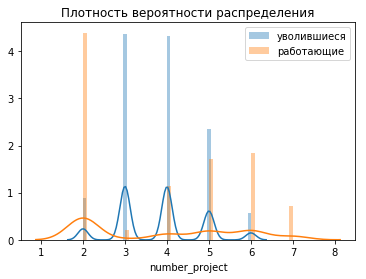

In [55]:
check_grup('number_project') 

In [63]:
dept= data.pivot_table(
            index = 'number_project', 
            columns = 'left',
            values = 'satisfaction_level', aggfunc = 'count', fill_value = 0)
print('Количество работников по проектам:')
dept

Количество работников по проектам:


left,0,1
number_project,,
2,821,1567
3,3983,72
4,3956,409
5,2149,612
6,519,655
7,0,256


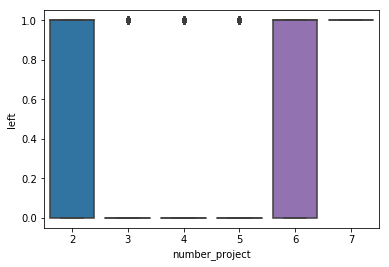

In [72]:
project= data.number_project.value_counts().sort_values(ascending = False).index.values
project
ax = sns.boxplot(x="number_project", y="left", 
            data=data[data.number_project.isin(project)])

Вывод: p-value меньше стандартной альфа ошибки 0.05, нулевая гипотеза не может быть принята. 
Можно сказать, что имеется статистическое различие между средним временем работы в месяц работающих и уволившихся.
Увольнение зависит от номера проекта (вероятно сложности и сроков до конца). Так, в 7 проекте нет работающих сотрудников.

Среднее кол-во отработанных часов в месяц и увольнение

-8.752254731850009 2.3113035567540143e-18
H0 не верна


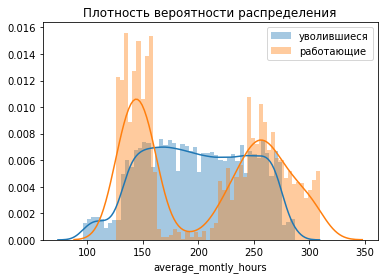

In [56]:
check_grup('average_montly_hours')

In [60]:
data.groupby('left')['average_montly_hours'].agg([np.mean, np.median, np.min,np.max])

,mean,median,amin,amax
left,,,,
0,199.060203,198,96,287
1,207.419210,224,126,310


Вывод: p-value меньше стандартной альфа ошибки 0.05, нулевая гипотезу не может быть принята. 
Можно сказать, что имеется статистическое различие между средним временем работы в месяц работающих и уволившихся.
Уволившиеся в среднем в месяц отработали больше, чем работающие

Время раьоты в кампании и увольнение

-17.924210234916142 4.207680457692835e-71
H0 не верна


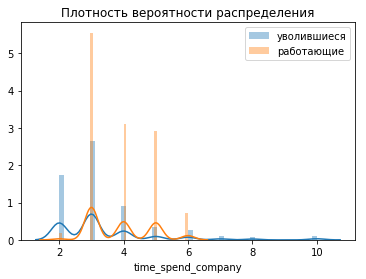

In [73]:
check_grup('time_spend_company')

In [75]:
year= data.pivot_table(
            index = 'time_spend_company', 
            columns = 'left',
            values = 'satisfaction_level', aggfunc = 'count', fill_value = 0)
print('Количество работников по сроку работы:')
year

Количество работников по сроку работы:


left,0,1
time_spend_company,,
2,3191,53
3,4857,1586
4,1667,890
5,640,833
6,509,209
7,188,0
8,162,0
10,214,0


Вывод: p-value меньше стандартной альфа ошибки 0.05, нулевая гипотезу не может быть принята. 
Можно сказать, что имеется статистическое различие между работающими и уволившимися в зависимости от срока работы в компании.
Чаще всего увольняются сотрудники, работающие 3-5 лет, им можно уделять особое внимание hr. 

Выводы:
    на увольнение сорудников влияют следующие факторы:
        1) уровень удовлетворенности
        2) повышение последние 5 лет
        3) номер проекта (из-за их разной сдожности и продолжительности)
        4) срок работы в компании (в зоне риска увольнения сотрудники от 3 до 5 лет работы)
        5) среднего кол-ва часов работы в месяц (чем больше времени работает сотрудник в месяц, тем больше риск увольнения)